In [375]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [376]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams.update({'font.size': 22})

In [377]:
SALARY_FIELD = 'Salary'

In [378]:
QUESTION_FIELD = 'PronounceGIF'

In [379]:
SALARY_MINIMUM = 10000

In [380]:
AGG_FN = 'median'

In [381]:
df = pd.read_csv('./developer_survey_2017/survey_results_public.csv')

In [382]:
df.dropna(subset=[SALARY_FIELD, QUESTION_FIELD], how='any', inplace=True)

In [383]:
smalldf = df[[SALARY_FIELD, QUESTION_FIELD]]

In [384]:
x = pd.DataFrame(smalldf[QUESTION_FIELD].astype(str).str.split(';').tolist(), index=smalldf[SALARY_FIELD])
x = x.reset_index()[[0, SALARY_FIELD]]
x.columns = [QUESTION_FIELD, SALARY_FIELD]
smalldf = x

In [385]:
smalldf = smalldf[smalldf[SALARY_FIELD] >= SALARY_MINIMUM]

In [386]:
groupby = smalldf.groupby(QUESTION_FIELD)

In [387]:
agg = groupby.agg(['count', AGG_FN]).reset_index()
sal = agg[SALARY_FIELD]
agg[SALARY_FIELD] = sal[sal['count'] > 50]
result = agg.dropna().sort_values([(SALARY_FIELD, AGG_FN)], ascending=False)
result

PronounceGIF  Salary              
                                            count        median
3            With a soft "g," like "jiff"  2597.0  59139.784946
1                          Some other way   188.0  56727.150538
2            With a hard "g," like "gift"  8257.0  55913.978495
0  Enunciating each letter: "gee eye eff"   210.0  29222.383721

In [388]:
num_respondents = result[(SALARY_FIELD, 'count')].sum()

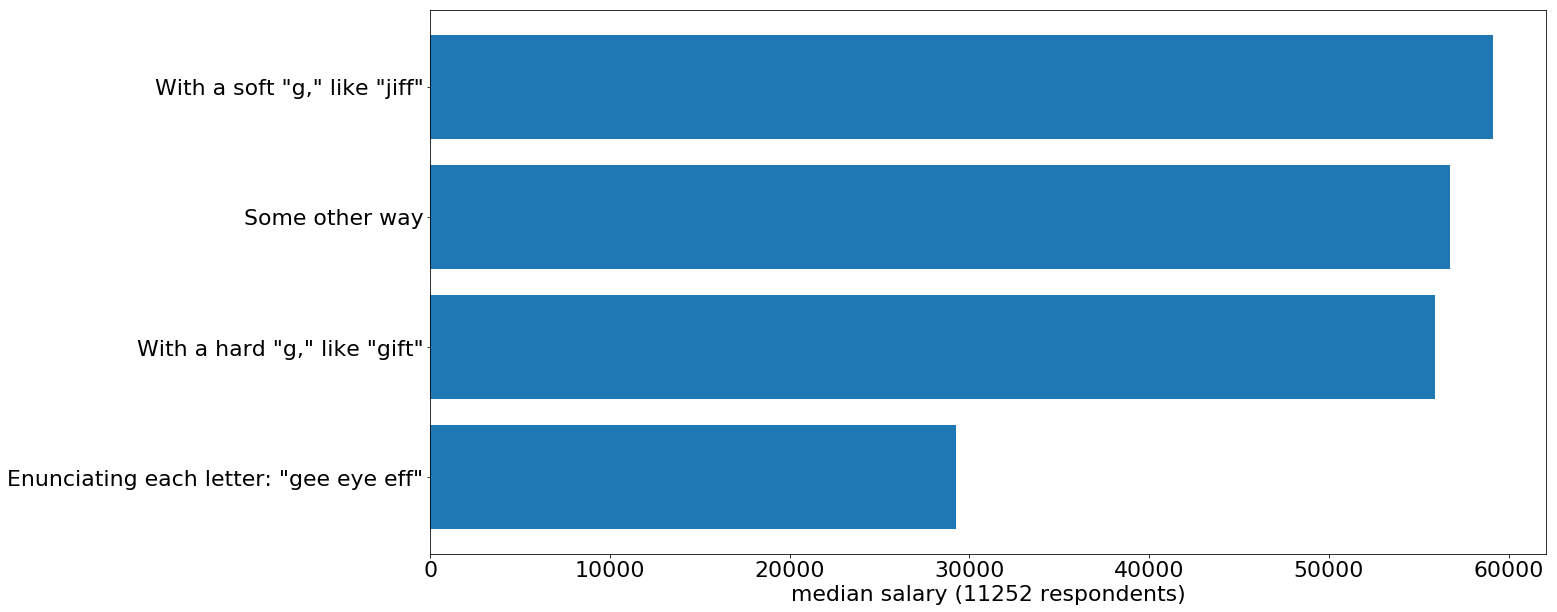

In [394]:
xs = result[QUESTION_FIELD]
xpos = np.arange(len(xs))[::-1]
ys = result[(SALARY_FIELD, AGG_FN)]
plt.barh(xpos, ys)
plt.yticks(xpos, xs)
plt.xlabel('%s %s (%d respondents)' % (AGG_FN, SALARY_FIELD.lower(), num_respondents))
plt.show()

In [390]:
groupby.std()

,Salary
PronounceGIF,
"Enunciating each letter: ""gee eye eff""",30388.069162
Some other way,35342.433341
"With a hard ""g,"" like ""gift""",35696.236280
"With a soft ""g,"" like ""jiff""",40428.361735


In [391]:
groupby.median()

,Salary
PronounceGIF,
"Enunciating each letter: ""gee eye eff""",29222.383721
Some other way,56727.150538
"With a hard ""g,"" like ""gift""",55913.978495
"With a soft ""g,"" like ""jiff""",59139.784946


In [392]:
groupby.min()

,Salary
PronounceGIF,
"Enunciating each letter: ""gee eye eff""",10000.000000
Some other way,10277.492292
"With a hard ""g,"" like ""gift""",10000.000000
"With a soft ""g,"" like ""jiff""",10000.000000


In [393]:
groupby.max()

,Salary
PronounceGIF,
"Enunciating each letter: ""gee eye eff""",160000.0
Some other way,167000.0
"With a hard ""g,"" like ""gift""",195000.0
"With a soft ""g,"" like ""jiff""",197000.0
